In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import os

In [3]:
ckpt_folder = 'ckpts/2025-02-13_09-26-08'

In [4]:
ckpt_name = 'FrankaCabinetGPT_epoch__iter0'

In [5]:
# Load the iter0 model checkpoint (this is the raw one from eureka, no model definitions)
model_path = os.path.join(ckpt_folder, f'{ckpt_name}.pth')
checkpoint = torch.load(model_path)

In [3]:
# Print the keys in the checkpoint to understand its structure
print("Checkpoint keys:", checkpoint.keys())

Checkpoint keys: dict_keys(['model', 'epoch', 'optimizer', 'frame', 'last_mean_rewards', 'env_state'])


In [4]:
for key in checkpoint.keys():
    print(key)
    print(checkpoint[key])
    print('-'*100)

model
OrderedDict([('value_mean_std.running_mean', tensor([0.3540], device='cuda:0', dtype=torch.float64)), ('value_mean_std.running_var', tensor([0.0139], device='cuda:0', dtype=torch.float64)), ('value_mean_std.count', tensor(44302337., device='cuda:0', dtype=torch.float64)), ('running_mean_std.running_mean', tensor([ 7.7362e-01, -8.7414e-01, -3.1050e-01,  7.2478e-02, -8.6934e-01,
         5.7276e-01,  4.3498e-01, -3.6325e-01, -8.5746e-01,  2.6950e-02,
        -2.2216e-02,  9.7481e-03,  9.1531e-03, -2.2967e-02,  8.7381e-03,
         1.1145e-02, -1.6231e-04,  8.5839e-05, -4.7596e-02, -2.1558e-02,
        -1.8353e-03,  1.4794e-03,  6.6555e-04], device='cuda:0',
       dtype=torch.float64)), ('running_mean_std.running_var', tensor([2.6148e-02, 3.4151e-02, 1.9142e-02, 4.0141e-02, 6.2457e-02, 1.4950e-01,
        3.7983e-02, 4.6096e-01, 2.1820e-01, 3.4214e-03, 2.1330e-03, 4.1675e-03,
        2.8878e-03, 7.4954e-03, 1.0477e-02, 8.8701e-03, 8.7858e-05, 5.9253e-05,
        1.4957e-02, 8.1266e

In [6]:
model = checkpoint['model']

In [7]:
for key in model.keys():
    print(key)
    print(model[key].shape)
    print('-'*100)


value_mean_std.running_mean
torch.Size([1])
----------------------------------------------------------------------------------------------------
value_mean_std.running_var
torch.Size([1])
----------------------------------------------------------------------------------------------------
value_mean_std.count
torch.Size([])
----------------------------------------------------------------------------------------------------
running_mean_std.running_mean
torch.Size([23])
----------------------------------------------------------------------------------------------------
running_mean_std.running_var
torch.Size([23])
----------------------------------------------------------------------------------------------------
running_mean_std.count
torch.Size([])
----------------------------------------------------------------------------------------------------
a2c_network.sigma
torch.Size([9])
----------------------------------------------------------------------------------------------------
a2c_n

In [7]:
traj_path = os.path.join(ckpt_folder, f'{ckpt_name}.npz')

In [8]:
# load from savez_compressed
traj = np.load(traj_path)
# save_dict = {
#     'pre_norm_obs': pre_norm_obs_all,
#     'post_norm_obs': post_norm_obs_all,
#     'mu': mu_all,
#     'logstd': logstd_all,
#     'value': value_all
# }



In [12]:
for key in traj.keys():
    array = traj[key]
    print(key)
    print(array.shape)

pre_norm_obs
(499, 64, 23)
post_norm_obs
(499, 64, 23)
mu
(499, 64, 9)
logstd
(499, 64, 9)
value
(499, 64, 1)


In [9]:
pre_norm_obs_all = traj['pre_norm_obs']
post_norm_obs_all = traj['post_norm_obs']
mu_all = traj['mu']
logstd_all = traj['logstd']
value_all = traj['value']

In [10]:
step=100
actor_idx=0
print(pre_norm_obs_all[step,actor_idx,:])
print(post_norm_obs_all[step,actor_idx,:])
print(mu_all[step,actor_idx,:])
print(logstd_all[step,actor_idx,:])
print(value_all[step,actor_idx])


[ 2.4240851e-02  4.3516529e-01 -4.9961877e-01 -5.4125190e-01
 -4.7009230e-01  5.6237423e-01 -4.8080504e-02 -9.9717927e-01
 -5.6636810e-02 -2.1786948e-01  2.1677487e-01  3.8737215e-02
 -2.1800037e-01  2.5540856e-01  2.8087482e-01 -2.8401431e-01
  2.4087435e-04  2.4605615e-04 -5.1012599e-01 -5.4074073e-01
  4.6717161e-01  1.7845549e-02 -4.0272433e-02]
[-4.633377    5.         -1.3666023  -3.0628715   1.5974289  -0.02686108
 -2.4782898  -0.9336845   1.714331   -4.179363    5.          0.4485173
 -4.219751    3.21325     2.657429   -3.1321995   0.04075776  0.01925253
 -3.7806396  -5.          5.          1.1189691  -2.1512938 ]
[-0.62020934  2.179959   -0.0081557   0.34715044  1.0866219   0.5599775
 -0.07410975 -0.942101    1.2570537 ]
[-0.8008243  -0.2617686  -0.85957855 -1.0931911  -1.0872859  -0.35269022
 -1.3971971  -0.9564724  -0.48616073]
[-2.3693867]


In [12]:
from utils.plots import plot_to_target_distance

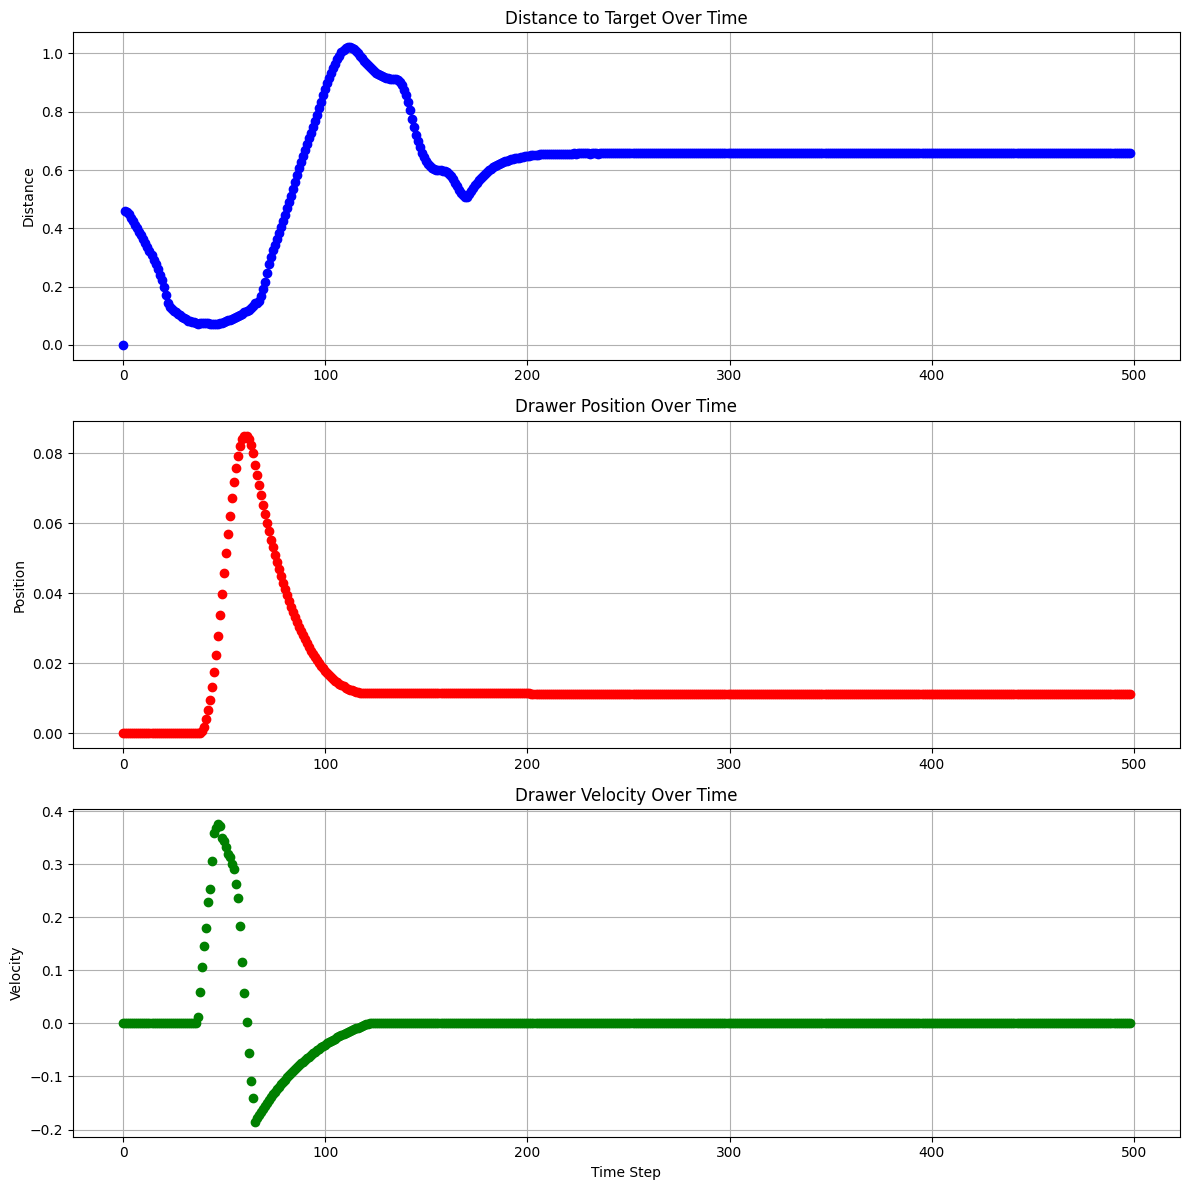

In [14]:
plot_to_target_distance(pre_norm_obs_all, actor_idx)

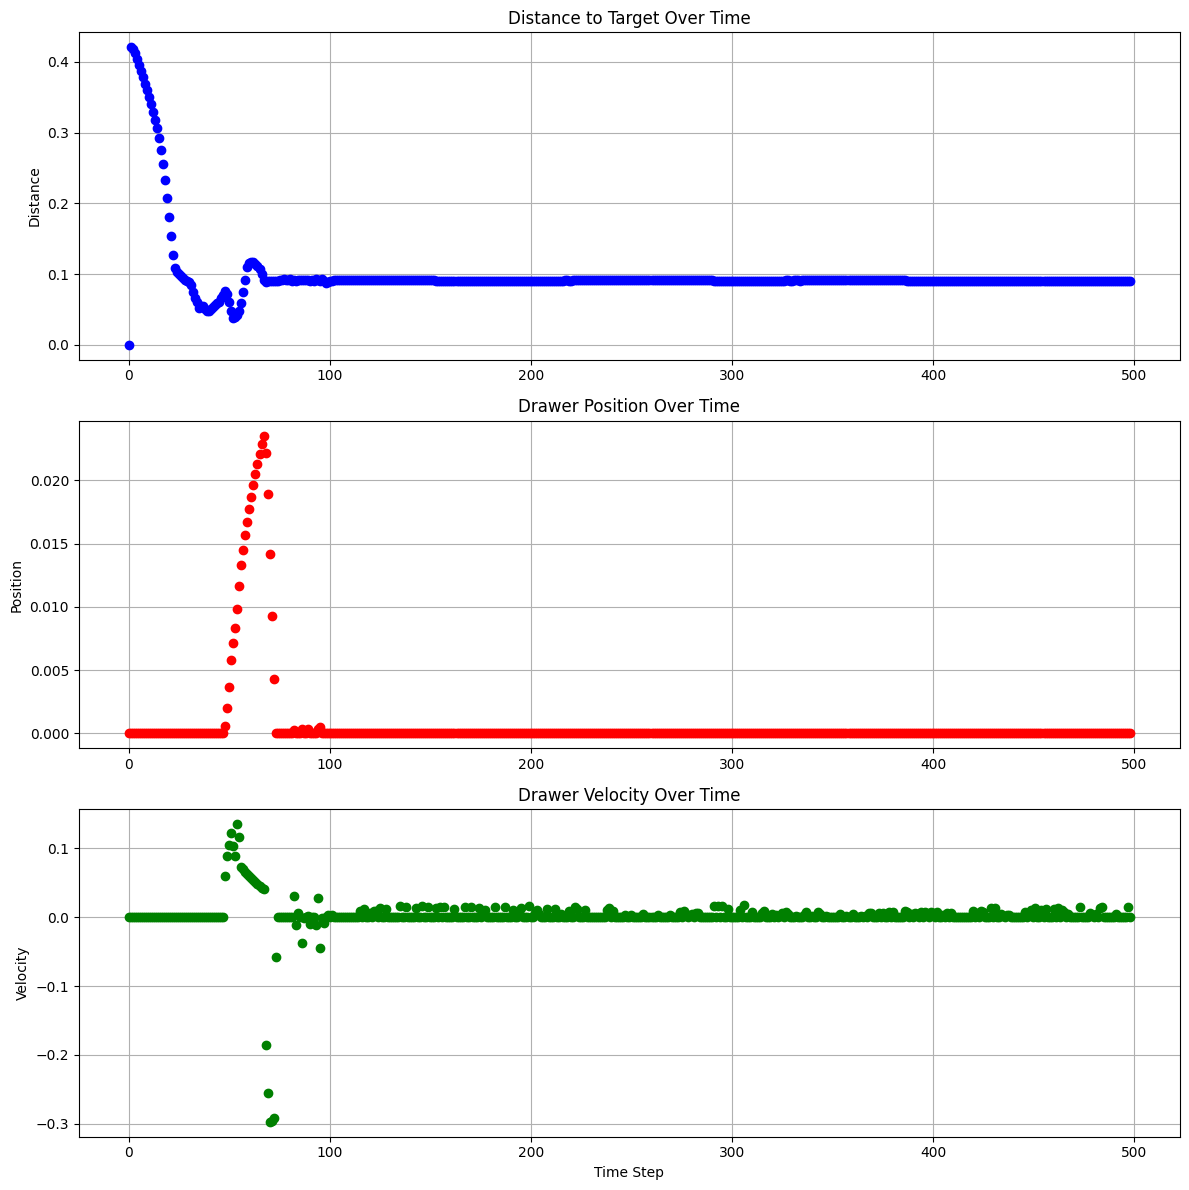

In [15]:
plot_to_target_distance(pre_norm_obs_all, 10)

We see that the arm approaches the drawer but doesnt pull (velocity and position are near zero)

In [16]:
traj_1 = np.load(os.path.join(ckpt_folder, 'FrankaCabinetGPT_epoch__iter1.npz'))

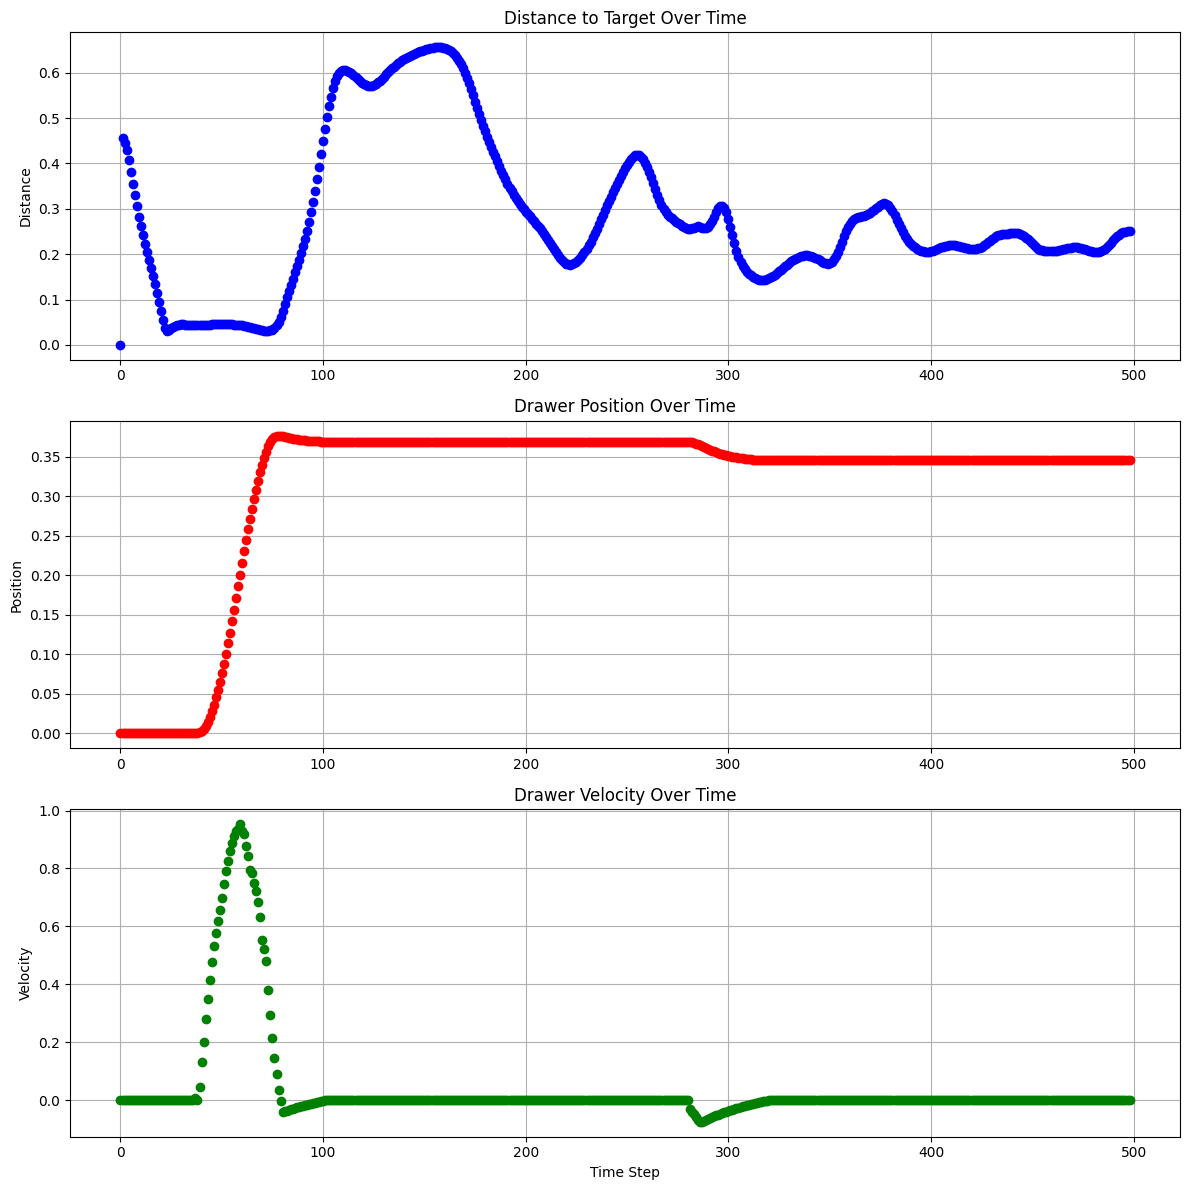

In [17]:
plot_to_target_distance(traj_1['pre_norm_obs'], 0)

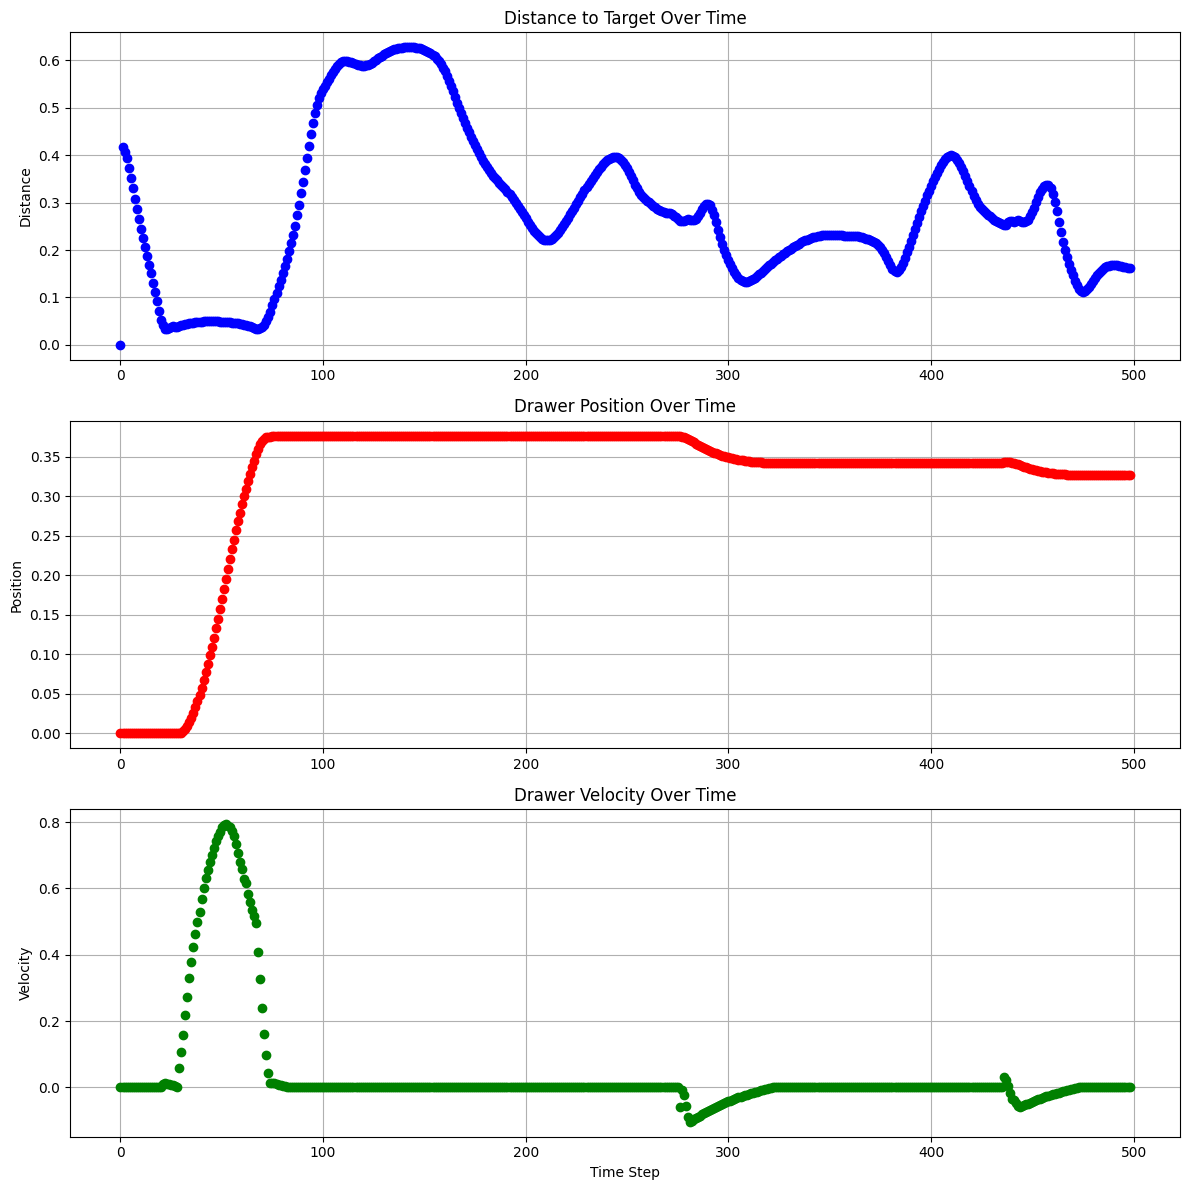

In [18]:
plot_to_target_distance(traj_1['pre_norm_obs'], 10)

arm approaches drawer, pulls (can see from drawer velocity and position) but not till success (position must be >0.39 to succeed)

In [19]:
traj_eval = np.load(os.path.join(ckpt_folder, 'FrankaCabinetGPT_epoch__eval.npz'))

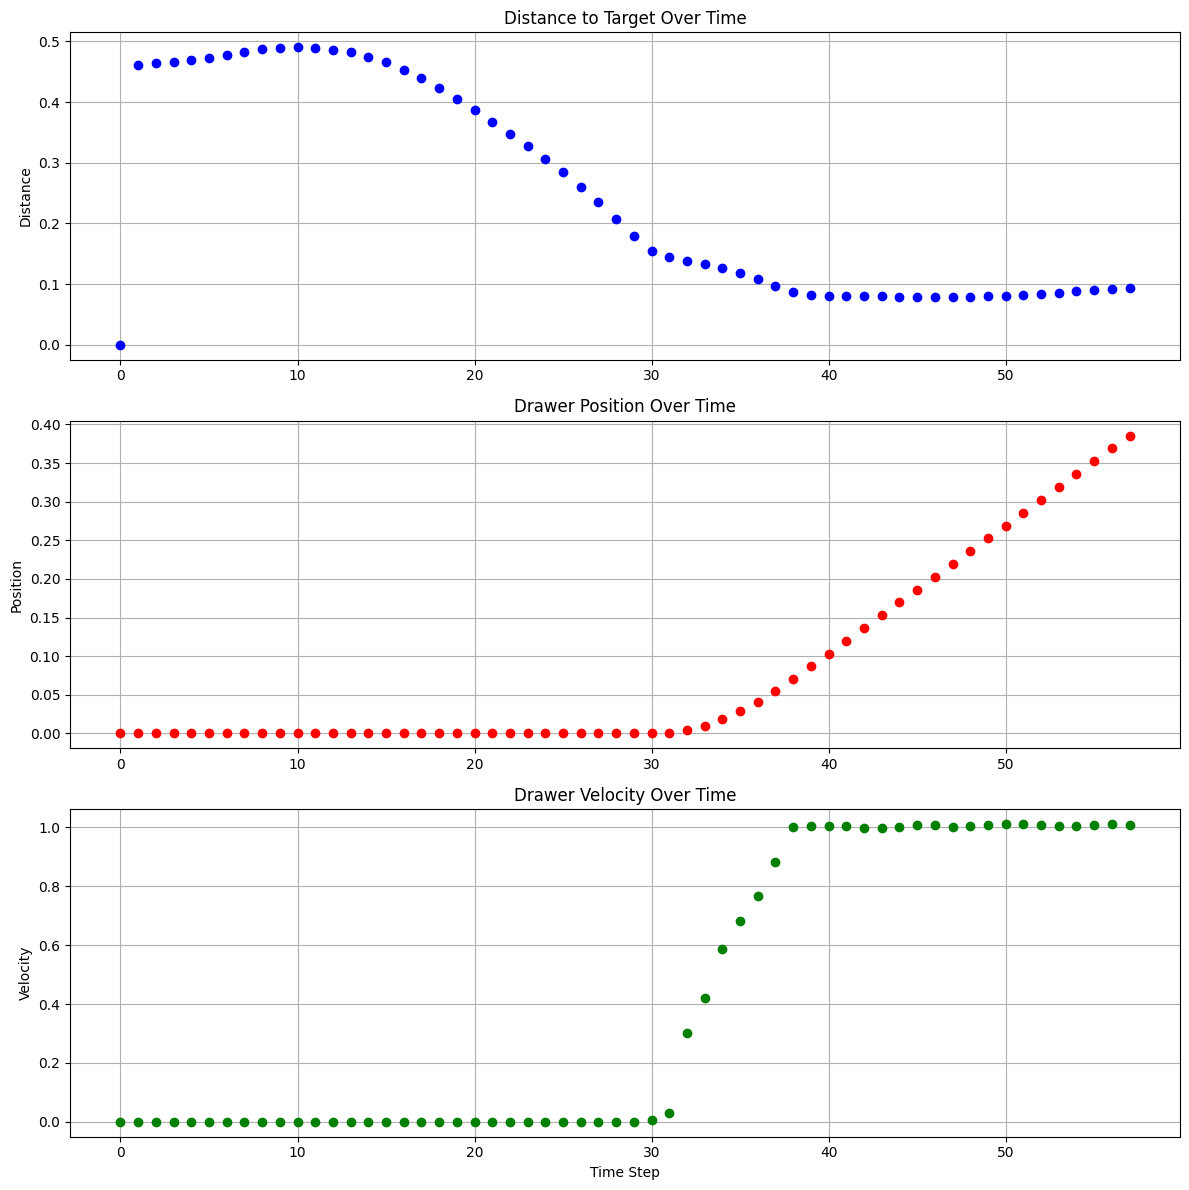

In [20]:
plot_to_target_distance(traj_eval['pre_norm_obs'], 0)

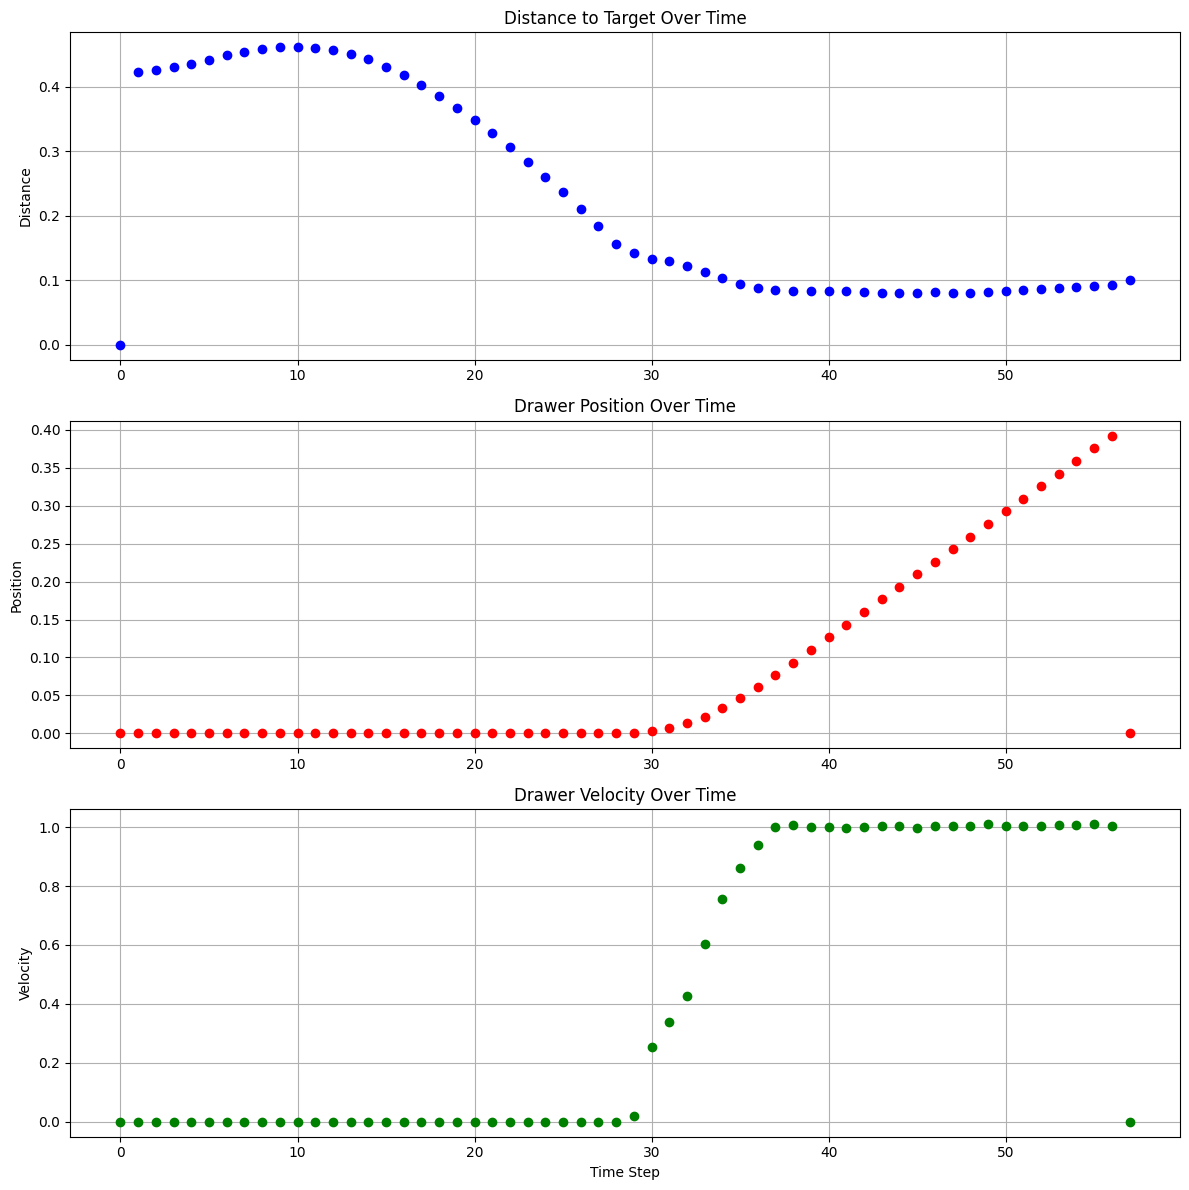

In [21]:
plot_to_target_distance(traj_eval['pre_norm_obs'], 10)

drawer is open till success (position > 0.39)